In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal


In this learning portfolio I would like to explore image compression as it is related to my project and could provide me with some usefull information. 

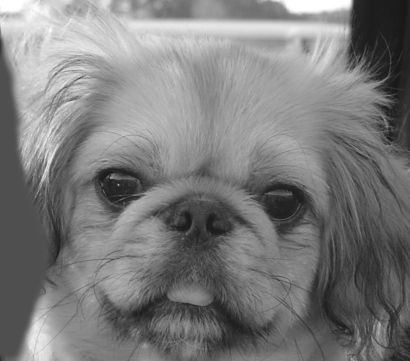

In [6]:
# open the image 
image = Image.open("data/dog.jpg")
#coverting the image to black and white so it is easier to process
image = image.convert('L')
image

We will start with this lovely image of a dog and convert it to greyscale so we only have to worry about 1 2d array instead of the 3 2d arrays which correspond to each of the color channels. This step is just to simplify the problem which we are working on so we can understand the main main concepts.

In [7]:
#now covert the image to an array so we can  apply computations of it. 
dog_array = np.array(image)

In the block below we are taking the fast fourier transform of the array of the black and white image and then we are taking the inverse fourier transform and converting it back to an image to show that the the inverse fourier transform is the same as the original image.

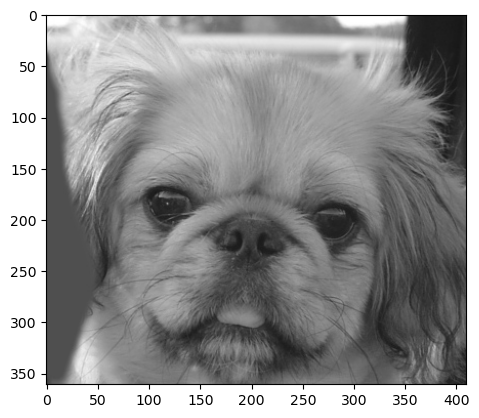

In [8]:
# find  the fourier coefficents of the 2d fast fourier transform
f = np.fft.fft2(dog_array)
inverse = np.real(np.fft.ifft2(f))

dog= Image.fromarray(inverse)
plt.imshow(dog)

In the code below we are making a plot of the different magnitudes of the fourier coefficents where the white values are very large coefficents and the darker values are closer to zero. 

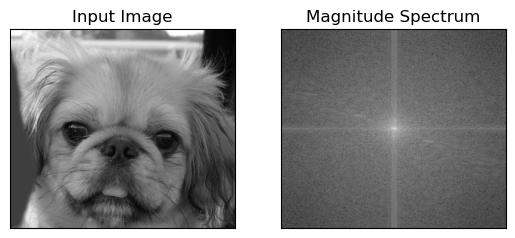

In [9]:
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.subplot(121),plt.imshow(image, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

Besides just looking at the magnitudes lets also just have a look at the array of coefficents after the fourier transform has been applied to see what the values look like. Since we know that the fourier transform yield complex values we can expect the coefficents will each have a real and imaginary part. 

In [10]:
f

array([[18287778.              +0.j        ,
         -876611.74420006-1130251.5174751j ,
        -1139512.29477812-1052525.8496973j , ...,
         -133604.56952928 +855673.52535844j,
        -1139512.29477812+1052525.8496973j ,
         -876611.74420006+1130251.5174751j ],
       [ 1000395.95959956-2486469.32741355j,
           89040.27486406  +84390.84748026j,
         -452475.74320843 -528821.25343232j, ...,
          475072.57045183 +900063.78694679j,
          -90252.04528593 +540749.87674048j,
          142404.3638602  +800554.03105328j],
       [ -158908.63318558 -556985.47842935j,
          208081.03999024 +287385.27762807j,
          294547.8921575  +264668.90302555j, ...,
         -163611.42960189 +167667.2888263j ,
          259478.31388629 +277035.8797108j ,
          486780.71722955 +194424.08224444j],
       ...,
       [  323386.7830299  +962410.52365413j,
           34796.09535918 -536458.9011372j ,
           39545.59868159 -124001.3096037j , ...,
           98342.266

By just looking at this array we can see the values seem to be pretty large

In [13]:
max = np.max(abs(f))
min = np.min(abs(f))
avg = np.mean(abs(f))
median = np.median(abs(f))

print(max, min, avg, median)

18287778.0 4.180251817065427 3354.8765623012046 1458.6058597221577


Now we are going to do some exploration of how much we can compress the photo by reducing the smaller fourier coefficents to zeros. As we can see in the image above that most of the magnitudes are dark and there is a small portion of white coefficents, the white coefficents correspond to the large magnitudes which are the ones that will contain the most information about the image. Lets start by getting rid of any values less than the median

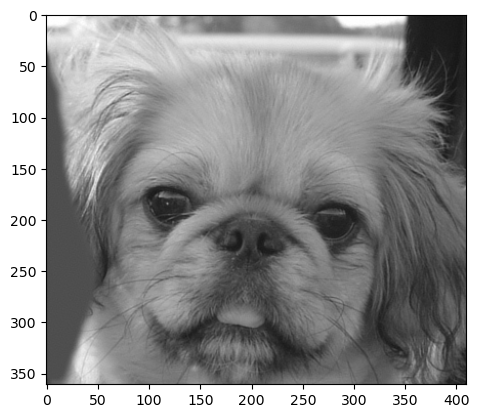

In [14]:
threshold = 1458
idx = (np.abs(f) > threshold)
f_thresh = idx*f

inverse = np.fft.ifft2(f_thresh).real

dog_thresh= Image.fromarray(inverse)
plt.imshow(dog_thresh)

In [15]:
np.count_nonzero(f_thresh)

74034

In [17]:
74034/(361*410)

0.5001959327072495

So using only 50% of largest coefficents we get a perfect reconstruction. Let's see how many pixels we can throw away before we get differences in the images. Next lets try the mean value as the threshold value. 

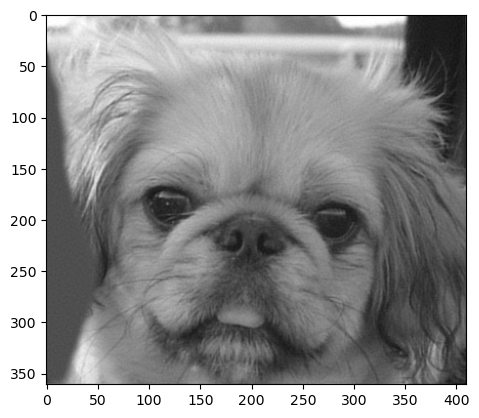

In [19]:
threshold = 3355
idx = (np.abs(f) > threshold)
f_thresh = idx*f

inverse = np.fft.ifft2(f_thresh).real

dog_thresh= Image.fromarray(inverse)
plt.imshow(dog_thresh)

In [21]:
np.count_nonzero(f_thresh)/(361*410)

0.2063576785352341

When we used the mean as the threshold we get another very clear image with only 20% of the coeffients. Since this image is still very good quality let't increase the threshold even higher. 

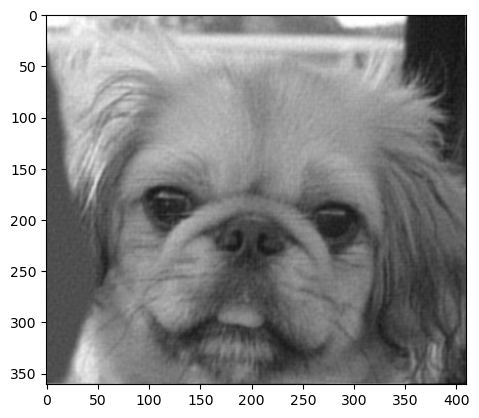

In [25]:
threshold = 7000
idx = (np.abs(f) > threshold)
f_thresh = idx*f

inverse = np.fft.ifft2(f_thresh).real

dog_thresh= Image.fromarray(inverse)
plt.imshow(dog_thresh)

In [24]:
np.count_nonzero(f_thresh)/(361*410)

0.06789406121208026

As we can see the image above is finally starting to lose quality the image above uses only 6% of the largest coefficents and it still looks pretty great other then some slight blurring. 

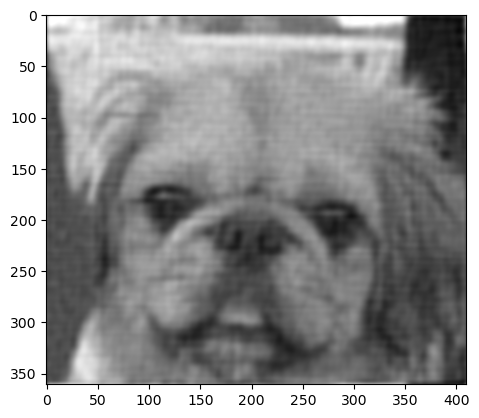

In [31]:
threshold = 20000
idx = (np.abs(f) > threshold)
f_thresh = idx*f

inverse = np.fft.ifft2(f_thresh).real

dog_thresh= Image.fromarray(inverse)
plt.imshow(dog_thresh)

In [32]:
np.count_nonzero(f_thresh)/(361*410)

0.013830146611715425

Wow the image above only uses 1% of the data. 

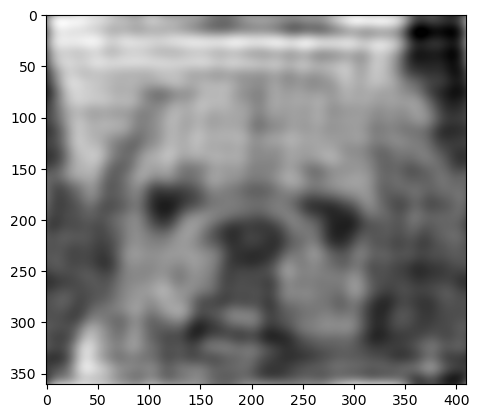

In [36]:
threshold = 100000
idx = (np.abs(f) > threshold)
f_thresh = idx*f

inverse = np.fft.ifft2(f_thresh).real

dog_thresh= Image.fromarray(inverse)
plt.imshow(dog_thresh)

In [37]:
np.count_nonzero(f_thresh)/(361*410)

0.0020066211742449836

Ok that was my last example using 0.2% of the data it becomes very blurry however you can still reconize that it is the original image. 

In [57]:
410*361/2

74005.0

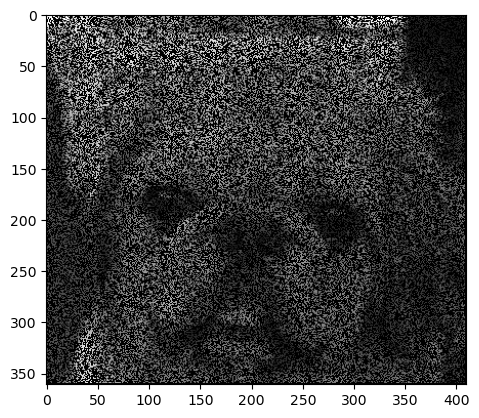

In [67]:
flattened = dog_array.flatten()
x = np.random.randint(0,360, size = 74005)
y = np.random.randint(0,409,size = 74005 )

sampled = np.zeros((361,410))

for n in range(len(x)):
    sampled[x[n]][y[n]] = dog_array[x[n]][y[n]]


plt.imshow(Image.fromarray(sampled.reshape(361,410)))

What the random sampling of image pixels looks like

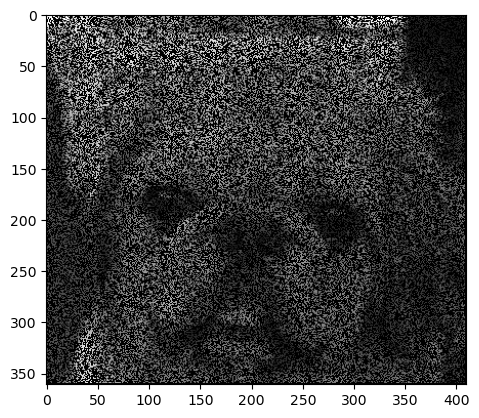

In [68]:
f_samp = np.fft.fft2(sampled)

inverse = np.real(np.fft.ifft2(f_samp))

dog_sampled= Image.fromarray(inverse)
plt.imshow(dog_sampled)

Some ideas from this image are recoverable but it is not doing an ideal job. Maybe we need to apply some sort of filter or interpoltae to get the missing pixels.

In [42]:
pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/35/69/b657974ddcbba54d59d7d62b01e60a8b815e35f415b996e4d355be0ac7b4/opencv_python-4.9.0.80-cp37-abi3-macosx_10_16_x86_64.whl.metadata
Using cached opencv_python-4.9.0.80-cp37-abi3-macosx_10_16_x86_64.whl (55.7 MB)
Note: you may need to restart the kernel to use updated packages.


In [43]:
import cv2

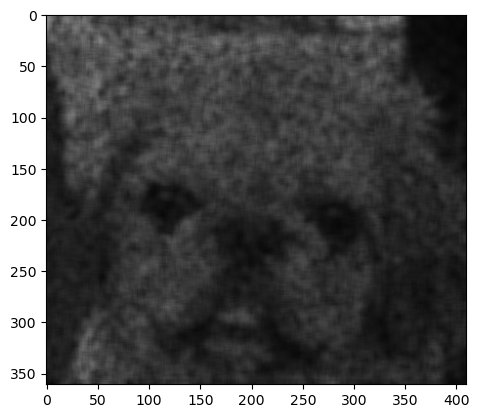

In [69]:
dog_filtered = Image.fromarray(cv2.GaussianBlur(np.array(dog_sampled),ksize= (9,9), sigmaX= 5))
plt.imshow(dog_filtered)

Well applying a filter does not exactly do what we want either.

**Conclusion**
In this learning portfolio I explored how to compress images so that we can store way fewer coefficents for a fourier transform instead of storing the value at every pixel. I found that when thresholding is applied the fourier transform of an image can have a sparse representation. I also discovered that while you can throw away lots and lots of fourier coefficents if you throw away any pixel values and then try to go from there it is very difficult to get good results. Overall I learned that images contain alot of data but if the right technique is applied that amount can be reduced significantly. 